## Sgr orbits in different DM models:

In [1]:
%pylab inline
import soda

font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
sgr_nbody = np.loadtxt('../examples/sgr_orbit.6e10c2.txt')

In [3]:
sat_pos = np.array([16.75, 2.44, -6.36])
sat_vel = np.array([235, -37, 210])
pos_host = np.array([0,0,0])
vel_host = np.array([0,0,0])
host_model1 = ['NFW', 1E12, 261, 9.86]
host_model2 = ['plummer', 1E12, 25, 9.86]

disk_params = [6.5E10, 3.5, 0.53]
bulge_params = [1E10, 0.7]
time = 8
d_t = 0.001
sgr_mass = 8E10

sat_model = ['hernquist', sgr_mass, 13]



In [8]:
alpha = [0, 0.15]
orbit_cdm = soda.leapfrog.integrate_sat(time, pos_host, vel_host, host_model1, disk_params, bulge_params, 
                                    alpha=alpha, dt=0.001, direction=1, satellite_model=sat_model, 
                                    pos_sat=sat_pos, vel_sat=sat_vel, C=0)


t = orbit_cdm[0]
xyz_sat = orbit_cdm[1]
vxyz_sat = orbit_cdm[2]
xyz_host = orbit_cdm[3]
vxyz_host = orbit_cdm[4]

0
Host:  0.0 0.0 0.0
Satellite 1 : 16.75 2.44 -6.36


In [5]:
"""
alpha = [0, 0.15]
orbit_tdm = soda.leapfrog.integrate_sat(time, pos_host, vel_host, host_model1, disk_params, bulge_params, 
                                    alpha=alpha, dt=0.00005, direction=1, C=1, satellite_model=sat_model, 
                                    pos_sat=sat_pos, vel_sat=sat_vel)


t_t = orbit_tdm[0]
xyz_sat_t = orbit_tdm[1]
vxyz_sat_t = orbit_tdm[2]
xyz_host_t = orbit_tdm[3]
vxyz_host_t = orbit_tdm[4]
"""

'\nalpha = [0, 0.15]\norbit_tdm = soda.leapfrog.integrate_sat(time, pos_host, vel_host, host_model1, disk_params, bulge_params, \n                                    alpha=alpha, dt=0.00005, direction=1, C=1, satellite_model=sat_model, \n                                    pos_sat=sat_pos, vel_sat=sat_vel)\n\n\nt_t = orbit_tdm[0]\nxyz_sat_t = orbit_tdm[1]\nvxyz_sat_t = orbit_tdm[2]\nxyz_host_t = orbit_tdm[3]\nvxyz_host_t = orbit_tdm[4]\n'

In [9]:
alpha = [0, 0.15, 1E-22]
orbit_uldm = soda.leapfrog.integrate_sat(time, pos_host, vel_host, host_model1, disk_params, bulge_params, 
                                    alpha=alpha, dt=0.001, direction=1, C=2, satellite_model=sat_model, 
                                    pos_sat=sat_pos, vel_sat=sat_vel)


t_ul = orbit_uldm[0]
xyz_sat_ul = orbit_uldm[1]
vxyz_sat_ul = orbit_uldm[2]
xyz_host_ul = orbit_uldm[3]
vxyz_host_ul = orbit_uldm[4]

2
Host:  0.0 0.0 0.0
Satellite 1 : 16.75 2.44 -6.36


In [10]:
alpha = [0, 0.15, 1E-21]
orbit_uldm2 = soda.leapfrog.integrate_sat(time, pos_host, vel_host, host_model1, disk_params, bulge_params, 
                                    alpha=alpha, dt=0.001, direction=1, C=2, satellite_model=sat_model, 
                                    pos_sat=sat_pos, vel_sat=sat_vel)


t_ul2 = orbit_uldm2[0]
xyz_sat_ul2 = orbit_uldm2[1]
vxyz_sat_ul2 = orbit_uldm2[2]
xyz_host_ul2 = orbit_uldm2[3]
vxyz_host_ul2 = orbit_uldm2[4]

2
Host:  0.0 0.0 0.0
Satellite 1 : 16.75 2.44 -6.36


In [11]:
alpha = [0, 0.15, 5E-22]
orbit_uldm3 = soda.leapfrog.integrate_sat(time, pos_host, vel_host, host_model1, disk_params, bulge_params, 
                                    alpha=alpha, dt=0.001, direction=1, C=2, satellite_model=sat_model, 
                                    pos_sat=sat_pos, vel_sat=sat_vel)


t_ul3 = orbit_uldm3[0]
xyz_sat_ul3 = orbit_uldm3[1]
vxyz_sat_ul3 = orbit_uldm3[2]
xyz_host_ul3 = orbit_uldm3[3]
vxyz_host_ul3 = orbit_uldm3[4]

2
Host:  0.0 0.0 0.0
Satellite 1 : 16.75 2.44 -6.36


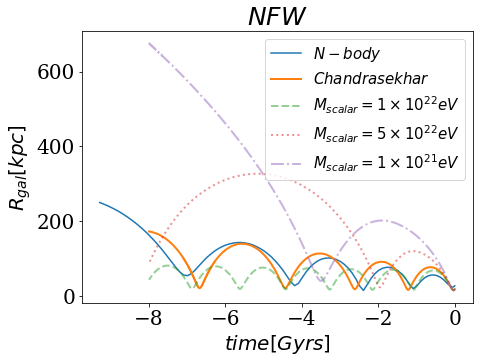

In [15]:
t_ul = orbit_uldm[0]

figure(figsize=(7,5))
title('$NFW$', fontsize=25)
plot(sgr_nbody[:,0]-max(sgr_nbody[:,0]), np.sqrt(sgr_nbody[:,1]**2 + sgr_nbody[:,2]**2 + sgr_nbody[:,3]**2)
    ,label='$N-body$')

plot(t, np.sqrt((xyz_sat[:,0]-xyz_host[:,0])**2.0+(xyz_sat[:,1]-xyz_host[:,1])**2.0 
                +(xyz_sat[:,2]-xyz_host[:,2])**2.0), lw=2.0, label='$Chandrasekhar$', alpha=1)


#plot(t_t, np.sqrt((xyz_sat_t[:,0]-xyz_host_t[:,0])**2.0+(xyz_sat_t[:,1]-xyz_host_t[:,1])**2.0 
#                +(xyz_sat_t[:,2]-xyz_host_t[:,2])**2.0), lw=2.0, alpha=0.5, label='$QM df$')

plot(t_ul, np.sqrt((xyz_sat_ul[:,0]-xyz_host_ul[:,0])**2.0+(xyz_sat_ul[:,1]-xyz_host_ul[:,1])**2.0 
                +(xyz_sat_ul[:,2]-xyz_host_ul[:,2])**2.0), lw=2.0, alpha=0.5, 
     label=r'$M_{scalar}=1\times10^{22} eV$', ls='--')

plot(t_ul3, np.sqrt((xyz_sat_ul3[:,0]-xyz_host_ul3[:,0])**2.0+(xyz_sat_ul3[:,1]-xyz_host_ul3[:,1])**2.0 
                +(xyz_sat_ul3[:,2]-xyz_host_ul3[:,2])**2.0), lw=2.0, alpha=0.5, 
     label=r'$M_{scalar}=5\times10^{22} eV$', ls=':')
plot(t_ul2, np.sqrt((xyz_sat_ul2[:,0]-xyz_host_ul2[:,0])**2.0+(xyz_sat_ul2[:,1]-xyz_host_ul2[:,1])**2.0 
                +(xyz_sat_ul2[:,2]-xyz_host_ul2[:,2])**2.0), lw=2.0, alpha=0.5, 
     label=r'$M_{scalar}=1\times10^{21} eV$', ls='-.')


legend(fontsize=15)

#ylim(0, 200)
#xlim(-2, 0)
xlabel('$time [Gyrs]$')
ylabel('$R_{gal} [kpc]$')
savefig('NFW_all.png', dpi=150, bbox_inches='tight')

In [5]:
alpha = [0, 0.15, 2.4E-22]
orbit_uldm4 = soda.leapfrog.integrate_sat(time, pos_host, vel_host, host_model2, disk_params, bulge_params, 
                                    alpha=alpha, dt=0.001, direction=1, C=2, satellite_model=sat_model, 
                                    pos_sat=sat_pos, vel_sat=sat_vel)


t_ul4 = orbit_uldm4[0]
xyz_sat_ul4 = orbit_uldm4[1]
vxyz_sat_ul4 = orbit_uldm4[2]
xyz_host_ul4 = orbit_uldm4[3]
vxyz_host_ul4 = orbit_uldm4[4]

2
Host:  0.0 0.0 0.0
Satellite 1 : 16.75 2.44 -6.36


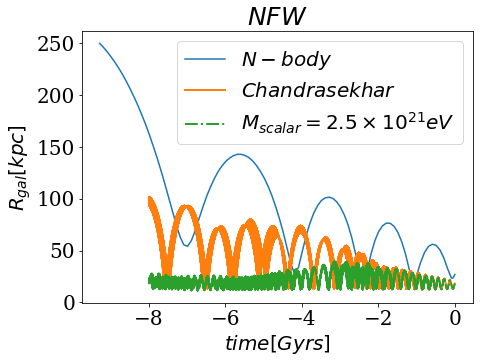

In [6]:
figure(figsize=(7,5))
title('$NFW$', fontsize=25)
plot(sgr_nbody[:,0]-max(sgr_nbody[:,0]), np.sqrt(sgr_nbody[:,1]**2 + sgr_nbody[:,2]**2 + sgr_nbody[:,3]**2)
    ,label='$N-body$')

plot(t, np.sqrt((xyz_sat[:,0]-xyz_host[:,0])**2.0+(xyz_sat[:,1]-xyz_host[:,1])**2.0 
                +(xyz_sat[:,2]-xyz_host[:,2])**2.0), lw=2.0, label='$Chandrasekhar$', alpha=1)

plot(t_ul4, np.sqrt((xyz_sat_ul4[:,0]-xyz_host_ul4[:,0])**2.0+(xyz_sat_ul4[:,1]-xyz_host_ul4[:,1])**2.0 
                +(xyz_sat_ul4[:,2]-xyz_host_ul4[:,2])**2.0), lw=2.0, alpha=1, 
     label=r'$M_{scalar}=2.5\times10^{21} eV$', ls='-.')

legend()

xlabel('$time [Gyrs]$')
ylabel('$R_{gal} [kpc]$')

#savefig('NFW_sgr_dm_models.png', dpi=150, bbox_inches='tight')